<a href="https://colab.research.google.com/github/MargoNupreichik/DS_jobs_salaries_analysis/blob/main/ds_job_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"margaritanupreichik","key":"fe28d66f39a29c61d5111c1462303f3f"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!cat ~/.kaggle/kaggle.json

{"username":"margaritanupreichik","key":"fe28d66f39a29c61d5111c1462303f3f"}

In [7]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [8]:
! kaggle datasets download -d abhinavshaw09/data-science-job-salaries-2024

  0% 0.00/90.2k [00:00<?, ?B/s]
100% 90.2k/90.2k [00:00<00:00, 8.38MB/s]


In [11]:
path = '/content/drive/MyDrive/data/'
import zipfile
with zipfile.ZipFile(path+'data-science-job-salaries-2024.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

## Поставленная задача - регрессия.
Тезисно - по признакам определить уровень з/п.  Предполагается использование линейной регрессии.

In [12]:
import pandas as pd
df = pd.read_csv(path+'salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


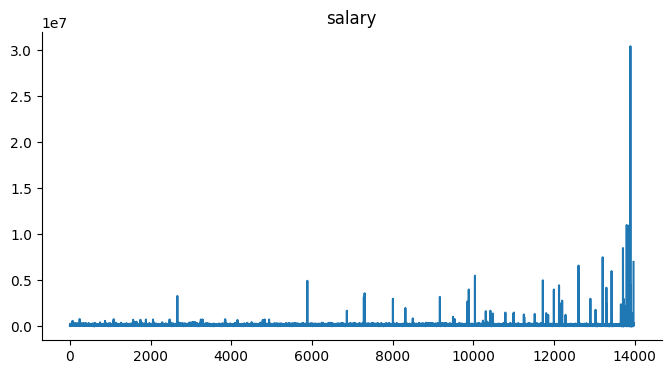

In [17]:
# The total gross salary amount paid.
# @title salary

from matplotlib import pyplot as plt
df['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

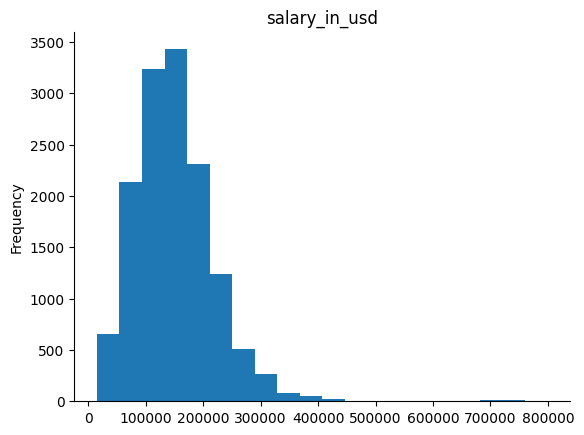

In [16]:
# The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
# @title salary_in_usd

from matplotlib import pyplot as plt
df['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
# предобработка данных
# категориальные признаки:
# [experience_level,	employment_type,	job_title, employee_residence,	company_location, company_size]

# просмотр уникальных значений по категориальным признакам
categories = ['experience_level',	'employment_type',	'job_title', 'employee_residence',
              'company_location', 'company_size']
for col in df:
  if col in categories:
   print(col, df[col].unique(), sep=' ')

experience_level ['SE' 'MI' 'EN' 'EX']
employment_type ['FT' 'CT' 'PT' 'FL']
job_title ['AI Engineer' 'Machine Learning Engineer'
 'Business Intelligence Developer' 'Data Engineer' 'Data Scientist'
 'Cloud Database Engineer' 'Research Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Applied Scientist' 'Data Science Manager'
 'Research Scientist' 'Prompt Engineer' 'Data Science'
 'Data Science Consultant' 'Data Management Analyst' 'Research Analyst'
 'Data Operations Analyst' 'Data Management Consultant'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Manager' 'ML Engineer'
 'Robotics Software Engineer' 'Machine Learning Researcher' 'AI Architect'
 'Data DevOps Engineer' 'Business Intelligence' 'AI Software Engineer'
 'Data Integration Engineer' 'Data Operations Specialist' 'BI Analyst'
 'Data Product Manager' 'Business Intelligence Engineer' 'Data Specialist'
 'AI Research Scientist' 'Data Science Director' 'Data Strategist'
 

<Axes: >

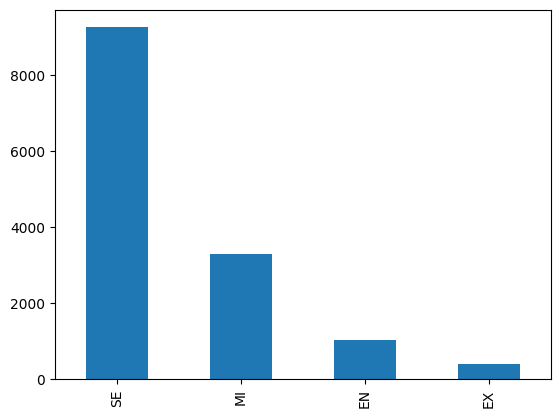

In [14]:
# вручную реально обработать: experience_level ['SE' 'MI' 'EN' 'EX']
#                             employment_type ['FT' 'CT' 'PT' 'FL']
#                             company_size ['L' 'M' 'S']

# графики: частота встречи каждого типа в каждом столбце
df['experience_level'].value_counts().plot.bar()

<Axes: >

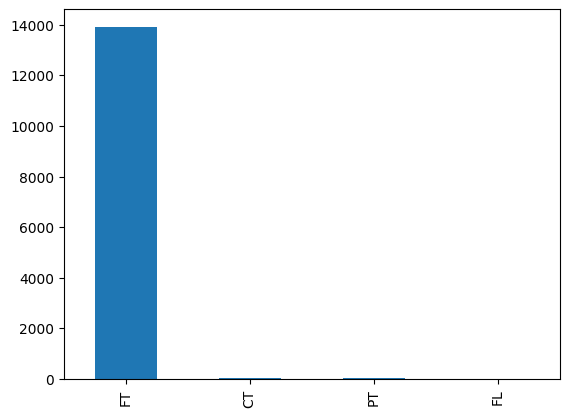

In [15]:
df['employment_type'].value_counts().plot.bar()

<Axes: >

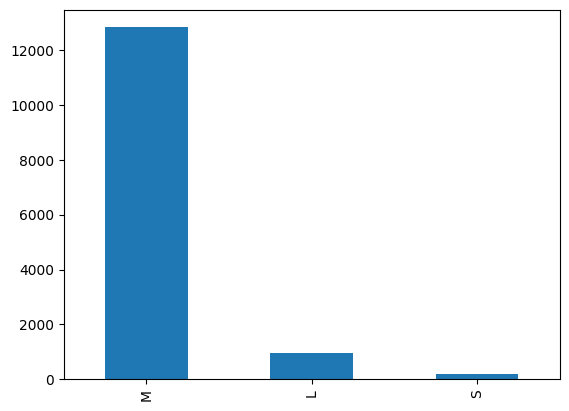

In [16]:
df['company_size'].value_counts().plot.bar()

In [25]:
from pandas.api.types import is_string_dtype

def preprocessing_data(df):

  def create_dict(df, col_title):
    title_list = df[col_title].unique()
    title_dict = dict(zip(title_list, [0]*len(title_list)))
    summary = df[col_title].count()

    for i in range(len(title_list)):
      val = len(df[df[col_title] == title_list[i]])
      title_dict.update({title_list[i]: float(val/summary)})

    return title_dict

  def categorical_to_numerical(df, col_name):
    item_dict = create_dict(df, col_name)

    def collate(a):
      if a in list(item_dict.keys()):
        a = item_dict[a]
      return a

    df[col_name] = df[col_name].apply(collate)
    return df

  features = list(df.columns)
  categorical_features = []
  for i in features:
    if is_string_dtype(df[i]):
      categorical_features.append(i)

  for feature in categorical_features:
    df = categorical_to_numerical(df, feature)
  return df

preprocessing_data(df)
df.head(n=10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.661895,0.995706,0.006370,90000,0.921557,90000,0.000286,0,0.000286,0.068924
1,2024,0.661895,0.995706,0.104924,180500,0.921557,180500,0.871099,0,0.874606,0.918337
2,2024,0.661895,0.995706,0.104924,96200,0.921557,96200,0.871099,0,0.874606,0.918337
3,2024,0.661895,0.995706,0.104924,235000,0.921557,235000,0.003292,0,0.003507,0.918337
4,2024,0.661895,0.995706,0.104924,175000,0.921557,175000,0.003292,0,0.003507,0.918337
5,2024,0.235757,0.995706,0.003507,95413,0.921557,95413,0.871099,100,0.874606,0.918337
6,2024,0.235757,0.995706,0.003507,70692,0.921557,70692,0.871099,100,0.874606,0.918337
7,2024,0.661895,0.995706,0.215932,110000,0.921557,110000,0.000787,0,0.000716,0.918337
8,2024,0.661895,0.995706,0.215932,48000,0.921557,48000,0.000787,0,0.000716,0.918337
9,2024,0.661895,0.995706,0.205697,222300,0.921557,222300,0.871099,0,0.874606,0.918337
